In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy import optimize as opt
from sklearn import linear_model

# Simple SIR Model
Note that the SIR model is a simple model that describes the spread of a disease in a population. The model divides the population into three compartments:
- S: The number of susceptible individuals
- I: The number of infected individuals
- R: The number of recovered individuals


The model is described by the following system of ordinary differential equations:

\begin{align}
\frac{dS}{dt} &= -\beta S I\\
\frac{dI}{dt} &= \beta S I - \gamma I\\
\frac{dR}{dt} &= \gamma I
\end{align}

Where:
- $\beta$ is the transmission rate
- $\gamma$ is the recovery rate
- $N = S + I + R$ is the total population
- $S(t)$, $I(t)$, and $R(t)$ are the number of susceptible, infected, and recovered individuals at time $t$, respectively.

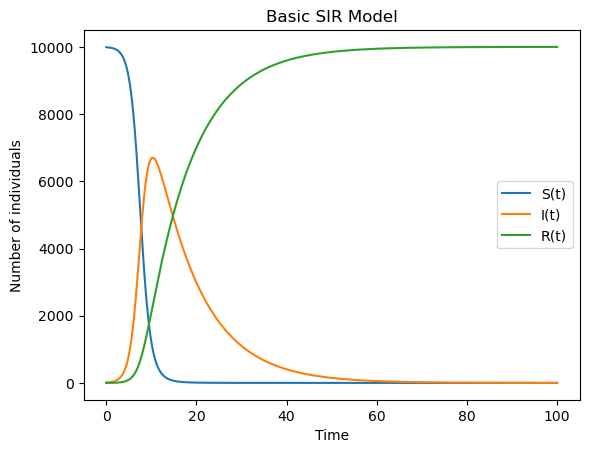

In [2]:
# plot basic SIR model
def SIR_model(y,t):
    S,I,R = y
    dS = -beta * S * I 
    dI = beta * S * I - gamma * I
    dR = gamma * I
    return dS, dI, dR

# initial conditions
I0 = 10
S0 = 10000
R0 = 0
beta = 0.0001
gamma = 0.1
t = np.linspace(0, 100, 1000)

# solve the ODEs
sol = sp.integrate.odeint(SIR_model, [S0, I0, R0], t)

# plot the results
plt.plot(t, sol[:, 0], label='S(t)')
plt.plot(t, sol[:, 1], label='I(t)')
plt.plot(t, sol[:, 2], label='R(t)')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('Basic SIR Model')
plt.legend()
plt.show()


In [3]:
'''
Solving for coefficients beta and gamma when S(t), I(t), and R(t) are numerically known
'''

# generate data from SIR model
def SIR_model(y,t):
    S,I,R = y
    dS = -beta * S * I 
    dI = beta * S * I - gamma * I
    dR = gamma * I
    return dS, dI, dR

# initial conditions
I0 = 10
S0 = 10000
R0 = 0
beta = 0.0001
gamma = 0.1
t = np.linspace(0, 100, 1000)

# solve the ODEs
sol = sp.integrate.odeint(SIR_model, [S0, I0, R0], t)


S = sol[:,0]
I = sol[:,1]
R = sol[:,2]


dS = -beta * S * I
dI = beta * S * I - gamma * I
dR = gamma * I

# create output matrix
y = np.column_stack((dS, dI, dR))

# create library matrix
X = np.column_stack((sol[:, 0] * sol[:, 1],sol[:, 1], sol[:, 2]))

# find coefficients using linear regression
regr = linear_model.LinearRegression()
regr.fit(X, y)

# print coefficients
print('Coefficients: \n', regr.coef_)



Coefficients: 
 [[-1.00000000e-04 -9.81768086e-18 -1.28242907e-17]
 [ 1.00000000e-04 -1.00000000e-01  5.08595778e-19]
 [ 4.85798432e-18  1.00000000e-01 -1.90233111e-17]]


# Ebola Data


In [4]:
# load ebola data
ebola = pd.read_json("codee_ebola-master/country_timeseries.json")
ebola.dropna(inplace = True)
ebola.sort_values("Day", inplace = True)
ebola.drop(ebola[ebola["Cases_Guinea"] == ''].index, inplace = True)

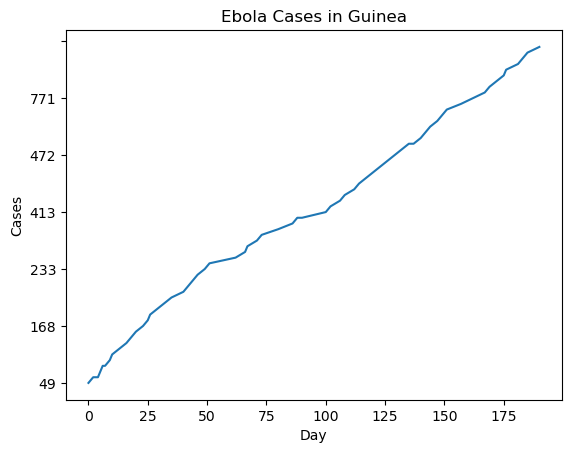

In [5]:
# plot values for Guinea
Y = ebola.loc[:,"Cases_Guinea"]
X = ebola.loc[:,"Day"]
plt.xlabel("Day")
plt.ylabel("Cases")
plt.title("Ebola Cases in Guinea")
stop=int(max(Y))
plt.yticks(np.arange(0, stop, step=10))
plt.plot(X,Y)

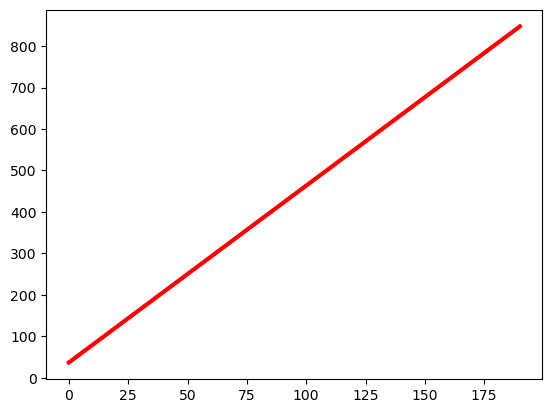

Coefficients: 
 [[4.26477124]]


In [6]:
# use linear regression to approximate the solution to the cases above
regr = linear_model.LinearRegression()
regr.fit(X.values.reshape(-1,1), Y.values.reshape(-1,1))
plt.plot(X, regr.predict(X.values.reshape(-1,1)), color='red', linewidth=3)
plt.show()

# print coefficients
print('Coefficients: \n', regr.coef_)

In [6]:
sd